# SUN3D
SUN3D [Xiao et al, 2013] has RGB-D scene dataset with following data.
- Sequence RGB and Depth image data, pose matrixes
- Camera information, ... etc.

Related URL
- [SUN3D Homepage](http://sun3d.cs.princeton.edu/)
- [GitHub](https://github.com/PrincetonVision/SUN3Dsfm)

Download a `SUN3Dv1.txt` (sample list):

In [ ]:
!wget http://sun3d.cs.princeton.edu/SUN3Dv1.txt
!mkdir ../../data/sun3d/
!mv SUN3Dv1.txt ../../data/sun3d/

The data of dataset is downloaded in sample (scene) units when the code is executed with `SUN3Dv1.txt`.  
**Note**: due to the distribution format, the download time per sample is very long.

After downloading, expand the dataset as follows:

```bash
../../data/sun3d
├─ <sceneName> ── <sceneName> # ex: brown_bm_1
：                   ├─ annotation/
                     ├─ depth/
                     ├─ extrinsics/
                     ├─ image/
                     └─ intrinsics.txt
：
└─ SUN3Dv1.txt
```


In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The subsection tutorial use following code:

In [16]:
# path to tutlibs
import path

from tutlibs.dataset import SUN3D, SUN3DData
from tutlibs.visualization import JupyterVisualizer as jv
from tutlibs.projection import depth_to_point

import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [20]:
DATA_PATH = "../../data/sun3d"
DATALIST_PATH = "../../data/sun3d/SUN3Dv1.txt"
dataset = SUN3D(DATA_PATH, DATALIST_PATH)
data: SUN3DData = dataset[0]


For each scene, the sequence depth (in `depth` dir) and color data (in `image` dir) is prepared. Also, we can construct a point cloud using a depth image and an intrinsic matrix (on `intrinsics.txt`):

frame length: 6553


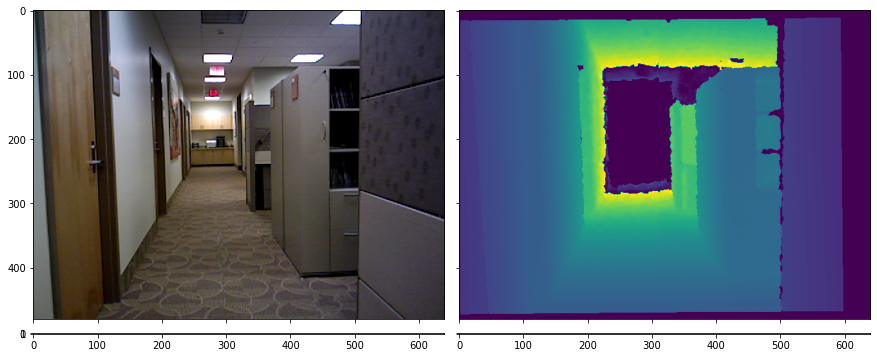

Output()

In [19]:
# check number of frames and select frame index for demonstration.
print(f"frame length: {len(data.color_image_paths)}")
frame_idx = 0

# loading data
depth_image = cv2.imread(data.depth_image_paths[frame_idx], -1)
color_image = cv2.cvtColor(cv2.imread(data.color_image_paths[frame_idx]), cv2.COLOR_BGR2RGB)

# visualize images.
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.2,)
for ax, im in zip(grid, [color_image, depth_image]):
    ax.imshow(im)
plt.show()

# visualize a point cloud.
fx = data.intrinsics_matrix[0, 0]
fy = data.intrinsics_matrix[1, 1]
cx = data.intrinsics_matrix[0, 2]
cy = data.intrinsics_matrix[1, 2]

depth_image = depth_image / 1000
point_cloud, pixel_indices = depth_to_point(depth_image, fx, fy, cx, cy)
colors = color_image[pixel_indices[:, 1], pixel_indices[:, 0]]
obj_point_cloud = jv.point(point_cloud, colors)
jv.display([obj_point_cloud])

## References
- Xiao, Jianxiong, Andrew Owens, and Antonio Torralba. 2013. “SUN3D: A Database of Big Spaces Reconstructed Using SfM and Object Labels.” In 2013 IEEE International Conference on Computer Vision. IEEE. https://doi.org/10.1109/iccv.2013.458.